In [13]:
import os
import lib
import clean
import normalize
import librosa
import matplotlib.pyplot as plt

In [7]:
speakers = ["george", "jackson", "nicolas", "lucas", "theo", "yweweler", ]
speaker_num = len(speakers)
files = os.listdir(lib.DIR)
coefs = []

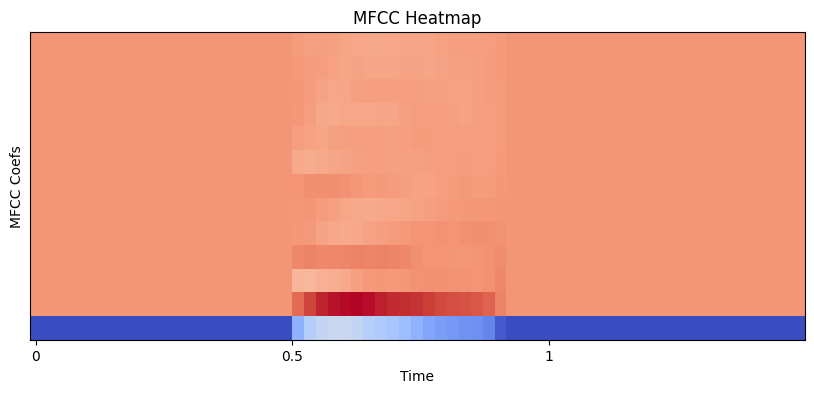

In [8]:
f = files[0]
y, sr = librosa.load(lib.DIR + f)
coefs  = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(coefs, x_axis='time')
plt.title('MFCC Heatmap')
plt.ylabel('MFCC Coefs')
plt.show()

In [14]:
filePaths = []
lables = []
data = []

In [15]:
print("cleaning data...")
clean.audio_cleaner(files)

cleaning data...


['5_nicolas_6.wav',
 '6_nicolas_14.wav',
 '5_nicolas_18.wav',
 '2_nicolas_24.wav',
 '8_nicolas_43.wav',
 '0_nicolas_43.wav',
 '9_nicolas_39.wav',
 '9_nicolas_32.wav',
 '2_nicolas_38.wav',
 '5_nicolas_3.wav',
 '0_nicolas_11.wav',
 '2_nicolas_16.wav',
 '1_nicolas_6.wav',
 '0_nicolas_36.wav',
 '1_nicolas_20.wav',
 '0_nicolas_7.wav',
 '3_nicolas_39.wav',
 '6_nicolas_27.wav',
 '4_nicolas_37.wav',
 '5_nicolas_15.wav',
 '0_nicolas_12.wav',
 '0_nicolas_25.wav',
 '3_nicolas_32.wav',
 '0_nicolas_48.wav',
 '6_nicolas_43.wav',
 '8_nicolas_33.wav',
 '5_nicolas_12.wav',
 '0_nicolas_6.wav',
 '6_nicolas_19.wav',
 '4_nicolas_4.wav',
 '2_nicolas_21.wav',
 '5_nicolas_44.wav',
 '4_nicolas_10.wav',
 '1_nicolas_11.wav',
 '4_nicolas_9.wav',
 '7_nicolas_33.wav',
 '1_nicolas_5.wav',
 '7_nicolas_20.wav',
 '7_nicolas_2.wav',
 '5_nicolas_26.wav',
 '7_nicolas_11.wav',
 '4_nicolas_3.wav',
 '8_nicolas_27.wav',
 '2_nicolas_1.wav',
 '8_nicolas_20.wav',
 '1_nicolas_23.wav',
 '6_nicolas_2.wav',
 '9_nicolas_7.wav',
 '3_n

In [16]:
normalize.flatten_volumes(files)

In [17]:
for s in speakers:
    for f in files:
        if f.__contains__(s):
                newdata = {"param": s, "name": lib.DIR+f}
                data.append(newdata)
                lables.append(s)

training  george
training  jackson
training  nicolas
training  lucas
training  theo
training  yweweler


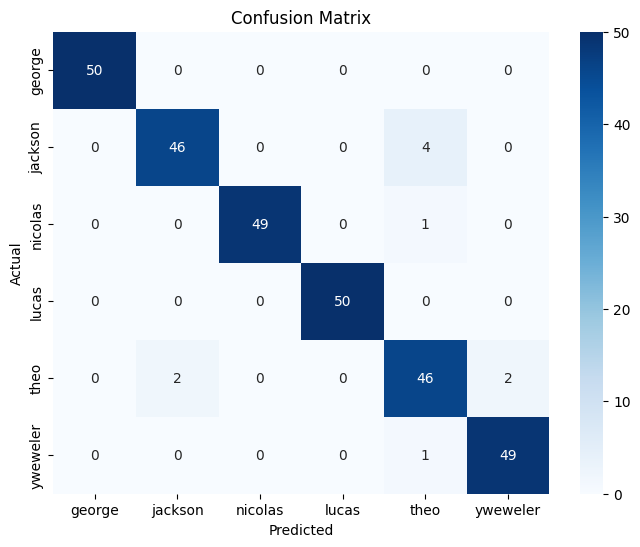

╒══════════╤═════════════╤══════════╤══════════╕
│          │   Precision │   Recall │       F1 │
╞══════════╪═════════════╪══════════╪══════════╡
│ george   │    1        │     1    │ 1        │
├──────────┼─────────────┼──────────┼──────────┤
│ jackson  │    0.958333 │     0.92 │ 0.938776 │
├──────────┼─────────────┼──────────┼──────────┤
│ nicolas  │    1        │     0.98 │ 0.989899 │
├──────────┼─────────────┼──────────┼──────────┤
│ lucas    │    1        │     1    │ 1        │
├──────────┼─────────────┼──────────┼──────────┤
│ theo     │    0.884615 │     0.92 │ 0.901961 │
├──────────┼─────────────┼──────────┼──────────┤
│ yweweler │    0.960784 │     0.98 │ 0.970297 │
╘══════════╧═════════════╧══════════╧══════════╛
total accuracy: 0.9666666666666667
micro precision: 0.9666666666666667 micro recall: 0.9666666666666667
macro precision: 0.967288838612368 macro recall: 0.9666666666666668
average F1: 0.9668220523532947


In [18]:
a, b = lib.lib_hmm_trainor(data, speakers)
lib.accuracy_evaluator(a, b, speakers, "library hmm")

training  george
training  jackson
training  nicolas
training  lucas
training  theo
training  yweweler


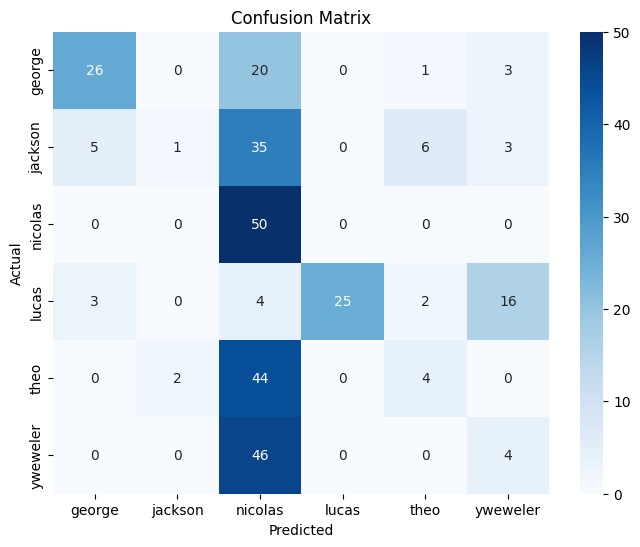

╒══════════╤═════════════╤══════════╤═══════════╕
│          │   Precision │   Recall │        F1 │
╞══════════╪═════════════╪══════════╪═══════════╡
│ george   │    0.764706 │     0.52 │ 0.619048  │
├──────────┼─────────────┼──────────┼───────────┤
│ jackson  │    0.333333 │     0.02 │ 0.0377358 │
├──────────┼─────────────┼──────────┼───────────┤
│ nicolas  │    0.251256 │     1    │ 0.401606  │
├──────────┼─────────────┼──────────┼───────────┤
│ lucas    │    1        │     0.5  │ 0.666667  │
├──────────┼─────────────┼──────────┼───────────┤
│ theo     │    0.307692 │     0.08 │ 0.126984  │
├──────────┼─────────────┼──────────┼───────────┤
│ yweweler │    0.153846 │     0.08 │ 0.105263  │
╘══════════╧═════════════╧══════════╧═══════════╛
total accuracy: 0.36666666666666664
micro precision: 0.36666666666666664 micro recall: 0.36666666666666664
macro precision: 0.4684723264386284 macro recall: 0.3666666666666667
average F1: 0.32621730755876077


In [19]:
hmm_model_results,test_list = lib.custom_hmm_trainor(data, speakers)
lib.accuracy_evaluator(hmm_model_results,test_list, speakers,"writen hmm")